In [1]:
print("Hi")

Hi


Dataset Shape: (920, 16)

Columns: ['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

First 5 rows:
    id  age     sex    dataset               cp  trestbps  chol  fbs  \
0   1   63    Male  Cleveland   typical angina       145   233    1   
1   2   67    Male  Cleveland     asymptomatic       160   286    0   
2   3   67    Male  Cleveland     asymptomatic       120   229    0   
3   4   37    Male  Cleveland      non-anginal       130   250    0   
4   5   41  Female  Cleveland  atypical angina       130   204    0   

          restecg  thalch  exang  oldpeak        slope  ca               thal  \
0  lv hypertrophy     150      0      2.3  downsloping   0       fixed defect   
1  lv hypertrophy     108      1      1.5         flat   3             normal   
2  lv hypertrophy     129      1      2.6         flat   2  reversable defect   
3          normal     187      0      3.5  downsloping   0    

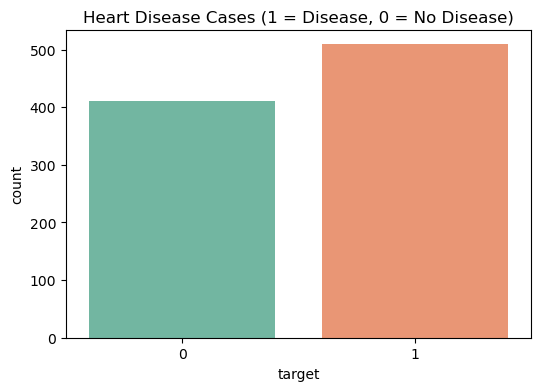

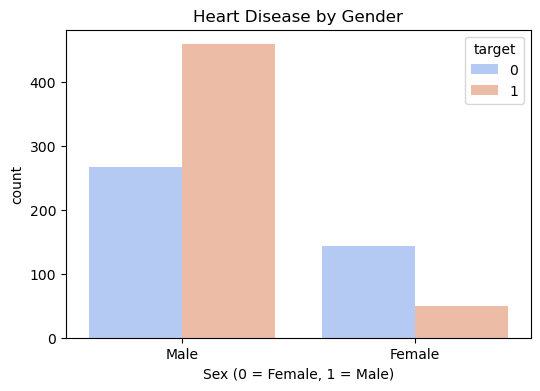

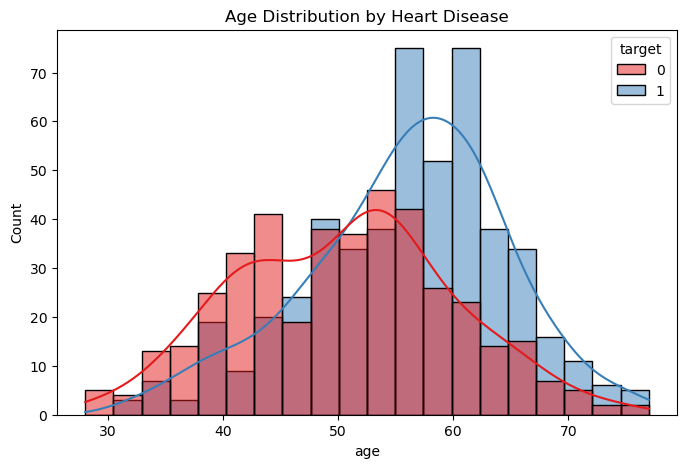

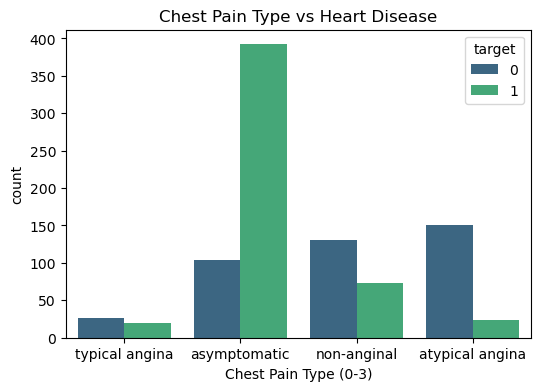

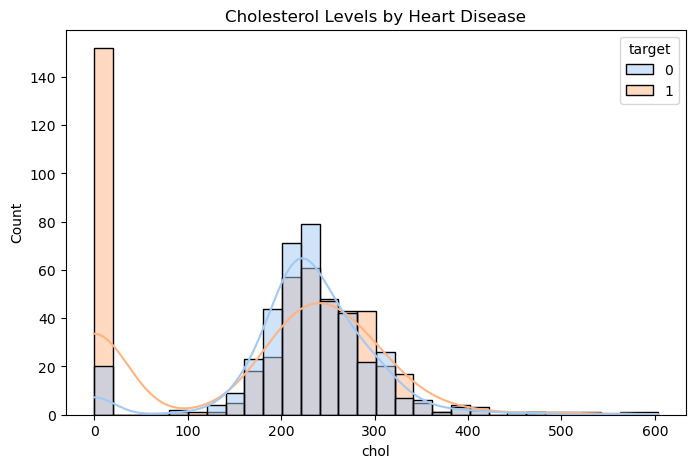

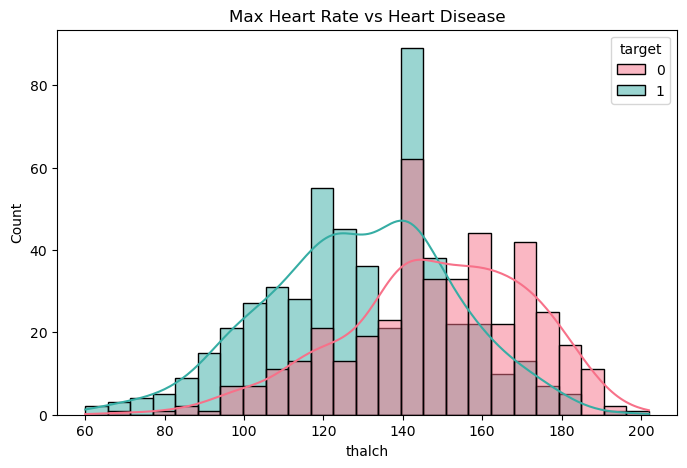

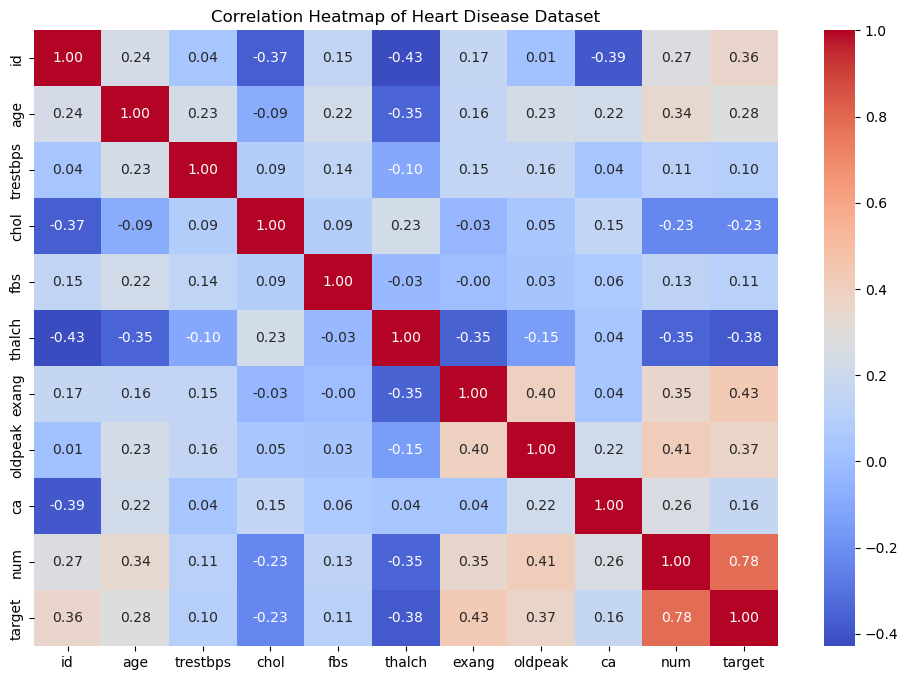


KEY INSIGHTS:
1. More patients with heart disease are in the age group 40–60.
2. Male patients show higher occurrence of heart disease compared to females.
3. Chest pain type cp=2 (non-anginal) & cp=3 (asymptomatic) are more linked with disease.
4. Higher maximum heart rate (thalach) tends to indicate no disease.
5. Very high cholesterol values are more often associated with disease.


In [1]:

#Heart Disease Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Loading clean dataset
data = pd.read_csv("Heart_disease.csv")

print("Dataset Shape:", data.shape)
print("\nColumns:", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())
print("\nMissing Values:\n", data.isnull().sum())
print("\nSummary Statistics:\n", data.describe(include="all"))

# 0 = No disease, 1 = Disease
if 'num' in data.columns:
    data['target'] = data['num'].apply(lambda x: 1 if x > 0 else 0)

# Exploratory Data Analysis (EDA)

# 1. Distribution of Heart Disease Cases
plt.figure(figsize=(6,4))
sns.countplot(x="target", hue="target", data=data, palette="Set2", legend=False)
plt.title("Heart Disease Cases (1 = Disease, 0 = No Disease)")
plt.show()


# 2. Gender-wise Distribution of Heart Disease
plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="target", data=data, palette="coolwarm")
plt.title("Heart Disease by Gender")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.show()

# 3. Age Distribution vs Heart Disease
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="age", hue="target", bins=20, kde=True, palette="Set1")
plt.title("Age Distribution by Heart Disease")
plt.show()

# 4. Chest Pain Type Analysis (cp)
plt.figure(figsize=(6,4))
sns.countplot(x="cp", hue="target", data=data, palette="viridis")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (0-3)")
plt.show()

# 5. Cholesterol Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="chol", hue="target", bins=30, kde=True, palette="pastel")
plt.title("Cholesterol Levels by Heart Disease")
plt.show()

# 6. Max Heart Rate Distribution
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="thalch", hue="target", bins=25, kde=True, palette="husl")
plt.title("Max Heart Rate vs Heart Disease")
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

print("\nKEY INSIGHTS:")
print("1. More patients with heart disease are in the age group 40–60.")
print("2. Male patients show higher occurrence of heart disease compared to females.")
print("3. Chest pain type cp=2 (non-anginal) & cp=3 (asymptomatic) are more linked with disease.")
print("4. Higher maximum heart rate (thalach) tends to indicate no disease.")
print("5. Very high cholesterol values are more often associated with disease.")
